# Simulation using `SKAT.haplotypes` data in R `SKAT` package

## Generate data 

We use haplotype data ([`SKAT.haplotypes`](https://cran.r-project.org/web/packages/SKAT/SKAT.pdf#page=23)) in R [`SKAT`](https://cran.r-project.org/web/packages/SKAT/SKAT.pdf) package to generate genotype matrix. This dataset is generated by calibration coalescent model (COSI) with mimicking LD structure of European ancestry.
Load [`RCall`](https://github.com/JuliaInterop/RCall.jl) package, which allows us to call R packages from within Julia.

In [1]:
using RCall

In [2]:
R"""
    packages <- c("SKAT", "gglasso")
    if (length(setdiff(packages, rownames(installed.packages()))) > 0) {
    install.packages(setdiff(packages, rownames(installed.packages())))
    }
    library(SKAT)
    data("SKAT.haplotypes")
    Haplotype <- SKAT.haplotypes$Haplotype
    SNPInfo <- SKAT.haplotypes$SNPInfo
""";

`SKAT.haplotypes` consists of two objects: `Haplotype` matrix and `SNPInfo` dataframe.
`Haplotype` is a matrix of size $10,000\times 3845$ where each row represents a different haplotype and each column represents a different SNP marker. 

In [3]:
@rget Haplotype

10000×3845 Array{Int64,2}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  1  0  0  0  0  0  0  0     0  0  0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  0  1  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  1  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  1  0  0  0  0  0  0  0     0  0  0  0  1  0  1  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  1  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  

`SNPInfo` contains information about 3,845 SNPs in `Haplotype` matrix. All SNPs come from chromosome 1, and chromosome position ranges from 79 to 199,956, or over 200k base pair region. 

In [4]:
@rget SNPInfo

,SNP,CHROM,CHROM_POS,ALLELE1,FREQ1,ALLELE2,FREQ2
,Int64,Int64,Int64,Int64,Float64,Int64,Float64
1,1,1,79,1,0.0008,2,0.9992
2,2,1,281,1,0.0001,2,0.9999
3,3,1,344,1,0.0001,2,0.9999
4,4,1,385,1,0.001,2,0.999
5,5,1,403,1,0.0011,2,0.9989
6,6,1,428,1,0.1387,2,0.8613
7,7,1,501,1,0.1051,2,0.8949
8,8,1,536,1,0.0011,2,0.9989
9,9,1,607,1,0.0015,2,0.9985


In [5]:
minimum(SNPInfo[:CHROM_POS]), maximum(SNPInfo[:CHROM_POS])

(79, 199956)

Assume one gene to be 5kb long, which translates to having 40 genes. We also assume sample size to be 500.

In [6]:
m = 40 # no. of genes
pj = 5000 # gene size 
n = 500 # sample size

500

Suppose that there are 5 causal genes, and that they are spread evenly across all 40 genes/groups. 

In [7]:
σ2 = zeros(m + 1)
σ2[end] = 1.0
for iter in Int.(round.(range(1, stop=m, length=5)))
     σ2[iter] = 5.0
end

In other words, we assume that these genes have positive variance components:

In [8]:
Int.(round.(range(1, stop=m, length=5)))

5-element Array{Int64,1}:
  1
 11
 20
 30
 40

Set seed first. 

In [9]:
using Random
Random.seed!(123);

To create a genotype matrix whose entries consist of {0,1,2}, we select `2n` rows from `Haplotype` without replacement and add the first `n` rows to the last `n` rows.

In [10]:
using StatsBase, LinearAlgebra
n = 500 # sample size 
idx = zeros(Int64, 2n)
sample!(1:size(Haplotype, 1), idx; replace=false)

# add two haplotype matrices to create a big block of genotype matrix
G = Haplotype[idx[1:n], :] + Haplotype[idx[n + 1:end], :]

500×3845 Array{Int64,2}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  1  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  1  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  1  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  1  0  0  0  0  0
 0  0  0  0  0  0  1  0  0  0  0  0  0     0  0  0  0  0  0  2  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  2  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  1  0  0  0  0  0  0  0  …  0  0  0  0  0  0  2  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0 

Now we construct covariance matrix `V[i]` for gene `i` by splitting up `G` matrix by chromosome position (5kb), multiplying by its transpose, and dividing by its Frobenius norm. 
Finally, we add these covariance matrices multiplied by variance component to create the overall covariance matrix `Ω` where $$\Omega = \sum_{i=1}^m \sigma_i^2 V_i + \sigma_0^2 I.$$

In [11]:
# construct covariance matrix Ω
Ω  = zeros(n, n)
grp_id = zeros(Int64, size(Haplotype, 2))
V  = Array{Matrix{Float64}}(undef, m + 1)
for k in 1:m
    local k
    i = k
    grp_id[(SNPInfo.CHROM_POS .> pj * (i-1)) .& (SNPInfo.CHROM_POS .<= pj * i)] .= i
    Vi = view(G, :, grp_id .== i)
    V[i] = Vi * Vi'
    V[i] ./= norm(V[i])
    Ω .+= σ2[i] .* V[i]
end
V[m + 1] = Matrix{Float64}(I, n, n) ./ √n
Ω .+= σ2[m + 1] .* V[m + 1]

# cholesky factorization after making it symmetric 
Ωchol = cholesky(Symmetric(Ω)) 

Cholesky{Float64,Array{Float64,2}}
U factor:
500×500 UpperTriangular{Float64,Array{Float64,2}}:
 0.286665  0.0308989  0.0         0.0929487   …   0.0           0.0189187  
  ⋅        0.314658   0.0736505   0.0190226       0.101801      0.0264071  
  ⋅         ⋅         0.31854    -0.00439827      0.104943      0.0218148  
  ⋅         ⋅          ⋅          0.351454        0.0575279     0.0555649  
  ⋅         ⋅          ⋅           ⋅              0.0366417     0.0350243  
  ⋅         ⋅          ⋅           ⋅          …   0.0636818     0.0445843  
  ⋅         ⋅          ⋅           ⋅              0.0735116     0.0241263  
  ⋅         ⋅          ⋅           ⋅              0.0334636    -0.0561523  
  ⋅         ⋅          ⋅           ⋅             -0.0718995     0.118174   
  ⋅         ⋅          ⋅           ⋅              0.0737071    -0.00769136 
  ⋅         ⋅          ⋅           ⋅          …   0.00933045    0.00570924 
  ⋅         ⋅          ⋅           ⋅             -0.014867      0.01

We also generate a covariate matrix with 10 covariates. 

In [12]:
p = 10
X = randn(n, p)

500×10 Array{Float64,2}:
  0.208919   -0.357512  -1.20512   …  -2.28353    0.469279   -0.4246    
  0.196372    1.10493    0.510995      0.94911    1.05211     0.190831  
 -0.964934    0.360943  -0.797932     -0.136343  -0.607956    0.0199318 
  0.17751     1.07779    1.01809      -1.60784    0.775929   -0.412176  
  1.59153     0.211548   0.887211     -0.899853  -2.34106     0.0259707 
 -0.151672   -2.1254    -1.2528    …   1.39219    0.47917     0.170861  
 -2.63614     1.04942    1.20896      -0.256876  -0.458283   -0.667652  
  0.822095   -0.354441   0.197945     -0.372056   0.313368   -0.358023  
 -1.30325    -0.160404  -0.613613      0.881436   1.7622     -1.33322   
 -1.1814     -0.60608    0.557166     -0.657915  -1.65057     0.969906  
  2.23366     0.43255    0.968414  …   2.48333    1.7669      0.172893  
  1.13666    -1.24071   -0.819892      1.15584    1.17051     0.531119  
 -1.09657    -0.528542  -1.16037      -0.772672  -0.416337   -0.168258  
  ⋮                       

Finally, we create a response vector using the Cholesky factorization.

In [13]:
β = ones(p)
y = X * β + Ωchol.L * randn(n) 

500-element Array{Float64,1}:
 -4.545804720152172 
  9.554438488673872 
 -2.2192477506797488
 -2.0143970037761805
  0.1104655736896164
 -3.875815486848486 
  1.3821967784546783
  2.313158560447355 
 -4.416332034149308 
 -3.8306940844226953
  6.857835924330509 
  5.754666454741338 
 -2.9589237786495675
  ⋮                 
  0.4678309058131852
  2.35901109726784  
 -4.2082139307110165
 -0.6635539857801465
  2.619826684097063 
  5.3827763283445185
 -2.2602354367020547
  2.601577888797258 
  0.589233811611282 
 -1.3458128723463212
 -1.3938624805614621
 -2.4166872919288918

## Perform variance component selection

We are ready to perform variance component selection. We add `VarianceComponentSelect` package first. 

In [14]:
using VarianceComponentSelect

┌ Info: Recompiling stale cache file /Users/juhyun-kim/.julia/compiled/v1.1/VarianceComponentSelect/iiLmX.ji for VarianceComponentSelect [684d1ed6-5d62-11e9-0c0b-878d753c12b1]
└ @ Base loading.jl:1184


Note that the package `VarianceComponentSelect` has not yet been registered and must be installed using the repository location. Start julia and use the `]` key to switch to the package manager REPL:
```julia
(v1.1) pkg> add https://github.com/juhkim111/VarianceComponentSelect.jl
```
Use the backspace key to return to the Julia REPL.

First, let's estimate `σ2` using no penalty. Function `vcselect` takes `y`, `X` and `V` as function arguments. Recall `V` is a vector of covariance matrices for each gene.

In [15]:
V

41-element Array{Array{Float64,2},1}:
 [0.00216934 0.0 … 0.0 0.00108467; 0.0 0.00216934 … 0.00108467 0.0; … ; 0.0 0.00108467 … 0.00542334 0.0; 0.00108467 0.0 … 0.0 0.00542334]                                                               
 [0.00305728 0.0 … 0.000436755 0.00305728; 0.0 0.00262053 … 0.00131026 0.0; … ; 0.000436755 0.00131026 … 0.00305728 0.000436755; 0.00305728 0.0 … 0.000436755 0.00655132]                               
 [0.0029001 0.000483349 … 0.000483349 0.000483349; 0.000483349 0.00338344 … 0.00241675 0.00386679; … ; 0.000483349 0.00241675 … 0.00241675 0.0029001; 0.000483349 0.00386679 … 0.0029001 0.00628354]    
 [0.00303009 0.0 … 0.00134671 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.00134671 0.0 … 0.000673353 0.0; 0.0 0.0 … 0.0 0.00639685]                                                                                   
 [0.000462421 0.0 … 0.0 0.0; 0.0 0.00416179 … 0.00184968 0.0; … ; 0.0 0.00184968 … 0.00138726 0.0; 0.0 0.0 … 0.0 0.00369937]                                  

In [16]:
@time σ̂2, β̂, obj, niters = vcselect(y, X, V)

 18.130934 seconds (6.06 M allocations: 1.682 GiB, 2.15% gc time)


([5.57283, 1.01048e-85, 7.61462e-176, 3.43492e-313, 1.10396e-128, 3.07466e-258, 5.69838e-88, 5.20527e-167, 7.46807e-124, 1.76796e-108  …  9.04641e-224, 1.44248e-87, 2.93472e-72, 4.15196e-108, 6.85221e-67, 3.0794e-71, 1.46907e-309, 1.08804e-95, 10.272, 0.910512], [0.994104, 0.998541, 1.00951, 1.01465, 0.983696, 0.983463, 0.984446, 0.997017, 1.00709, 1.01445], 0.5888490295104702, 727, [0.106902 0.0315701 … 0.0423551 0.0105005; 0.0315701 0.122341 … 0.0758614 0.0152515; … ; 0.0423551 0.0758614 … 0.274371 0.00193551; 0.0105005 0.0152515 … 0.00193551 0.185493])

Variance component estimates using no penalty are as follows. 

In [17]:
σ̂2

41-element Array{Float64,1}:
  5.5728301991480285     
  1.0104767734974897e-85 
  7.614622566857275e-176 
  3.4349241892e-313      
  1.1039552079903513e-128
  3.0746626043932357e-258
  5.698378340206959e-88  
  5.205265488318746e-167 
  7.468073765532735e-124 
  1.7679611160977654e-108
  6.302861736129972      
  0.07567500003374832    
  7.98907720515842e-103  
  ⋮                      
  5.197286859889341      
  1.6080719227180532e-25 
  9.04641169743933e-224  
  1.4424773837643392e-87 
  2.93472424791966e-72   
  4.15195708560389e-108  
  6.852214900343889e-67  
  3.0794049595822846e-71 
  1.46907188536606e-309  
  1.0880426736736295e-95 
 10.272029066726434      
  0.9105124511015805     

Fixed effects estimates are as follows: 

In [18]:
β̂

10-element Array{Float64,1}:
 0.9941039312128814
 0.998540800362796 
 1.0095117341485684
 1.014648476713846 
 0.9836964511870776
 0.9834625330429799
 0.9844458851211834
 0.9970169763168649
 1.007091855535191 
 1.0144488004890304

We can use the estimates above as a penalty weight for adaptive lasso penalty later. 

In [19]:
penwt = zeros(m + 1)
penwt[1:m] = 1 ./ sqrt.(σ̂2[1:m])

40-element Array{Float64,1}:
 0.42360599204840577   
 3.145841463342626e42  
 3.6238966974297213e87 
 1.7062451182282096e156
 9.517530422165131e63  
 5.70297236489518e128  
 4.189135033364327e43  
 1.3860489157769517e83 
 3.6592804927396087e61 
 7.52079317340098e53   
 0.39831907972378483   
 3.635162127627857     
 1.1187980247137966e51 
 ⋮                     
 0.7286783499462401    
 0.4386434573876629    
 2.4937175713199897e12 
 3.32477167378413e111  
 2.6329674710500506e43 
 5.837358279305417e35  
 4.907649881456561e53  
 1.208048895298627e33  
 1.802049007175099e35  
 2.6090264159871108e154
 3.031635859934528e47  
 0.3120124187358858    

### Selection at specific tuning parameter

Now let's say we want to select variance components at $\lambda=2.0$ using lasso penalty.

In [20]:
σ̂2, β̂, obj, niters, Ω̂ = vcselect(y, X, V; penfun= L1Penalty(), λ=2.0)

([4.81816, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.49042, 1.01122], [0.994379, 0.994173, 1.0123, 1.01709, 0.982608, 0.984712, 0.985968, 0.995469, 1.00705, 1.01598], 24.883144706338214, 150, [0.0709435 0.00524917 … 2.00552e-22 0.00522611; 0.00524917 0.080483 … 0.0204942 0.00476971; … ; 2.00552e-22 0.0204942 … 0.132577 0.0; 0.00522611 0.00476971 … 0.0 0.12305])

Required arguments of `vcselect` are:

* `y`, response vector
* `X`, design matrix
* `V`, vector of covariance matrices.

Keyword (optional) arguments include: 
* `penfun`, penalty function (e.g. `L1Penalty()`, `MCPPenalty()`), default is no penalty. 
* `λ`, tuning parameter value. 

`vcselect` function returns:
* `σ̂2`, a vector of estimated variance components
* `β̂`, estimated fixed effects paramter vector
* `obj`, objective value at the estimate `σ̂2`
* `niters`, the number of iterations to reach convergence
* `Ω̂`, the estimated overall covariance matrix. 

Let's take a look at the estimates for $\sigma^2.$

In [21]:
σ̂2

41-element Array{Float64,1}:
 4.81816305576863  
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 3.9985305491869343
 0.0               
 0.0               
 ⋮                 
 2.9630747959557713
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 0.0               
 5.4904170497877125
 1.011222985193845 

Selected variance components (i.e. positive ones) are 1st, 11th, 20th, 21st, 30th, and 40th. Recall that positive components in true variance component parameter are 1, 11, 20, 30, 40.

In [22]:
findall(x -> x > 0, σ̂2[1:end-1])

6-element Array{Int64,1}:
  1
 11
 20
 21
 30
 40

We also have estimates for fixed effects parameter $\beta.$

In [23]:
β̂

10-element Array{Float64,1}:
 0.9943791518435511
 0.9941726386937203
 1.0122991523170852
 1.0170886129942567
 0.9826078518566669
 0.9847116949698355
 0.9859679430499662
 0.9954692999553716
 1.0070532202562326
 1.015979965950595 

Estimate overall covariance matrix $\widehat{\Omega}$ using ${\widehat{\sigma}}^2$:

In [24]:
Ω̂

500×500 Array{Float64,2}:
 0.0709435    0.00524917  1.00276e-22  …  2.00552e-22  0.00522611 
 0.00524917   0.080483    0.015245        0.0204942    0.00476971 
 1.00276e-22  0.015245    0.0843418       0.0252639    0.00476971 
 0.0147886    0.00524917  0.0             0.0209044    0.0209044  
 0.0          0.00953942  0.0             0.0209044    0.00953942 
 0.0          0.0100189   0.0100189    …  0.0258417    0.00953942 
 0.00524917   0.0104983   0.0100189       0.0669805    0.0256742  
 0.00524917   0.015268    0.0100189       0.0564069    0.0        
 0.00522611   0.00953942  0.00383583      0.0104522    0.0357622  
 0.015245     0.015268    0.00524917      0.0314028    0.00999582 
 0.0147886    0.0104753   0.00522611   …  0.0359128    0.0        
 0.0104983    0.015268    0.00476971      0.0209044    0.00953942 
 0.015245     0.0100189   0.00476971      0.0256742    0.00522611 
 ⋮                                     ⋱                          
 0.00476971   0.0104753   0.0143111 

The same procedure can be applied for different penalties at different $\lambda$ values. We try MCP penalty and 1.5 as tuning parameter value.

In [25]:
σ̂2, β̂, obj, niters, Ω̂ = vcselect(y, X, V; penfun= MCPPenalty(), λ=1.5)

([6.09762, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.6382, 0.965997], [0.994009, 0.995461, 1.01021, 1.01555, 0.983091, 0.98381, 0.985254, 0.996183, 1.00675, 1.01553], 10.660906714905764, 219, [0.0801683 0.00897882 … 0.00133653 0.0066139; 0.00897882 0.0918465 … 0.0329131 0.00489352; … ; 0.00133653 0.0329131 … 0.188661 0.0; 0.0066139 0.00489352 … 0.0 0.152949])

In [26]:
σ̂2

41-element Array{Float64,1}:
  6.097617720282485 
  0.0               
  0.0               
  0.0               
  0.0               
  0.0               
  0.0               
  0.0               
  0.0               
  0.0               
  5.938226947961592 
  0.0               
  0.0               
  ⋮                 
  4.691182940571153 
  0.0               
  0.0               
  0.0               
  0.0               
  0.0               
  0.0               
  0.0               
  0.0               
  0.0               
 10.638224233754132 
  0.9659974218242179

In [27]:
β̂

10-element Array{Float64,1}:
 0.9940092694950705
 0.9954610542896325
 1.0102097930390743
 1.0155513451643254
 0.9830906627198105
 0.9838095862050711
 0.9852535053505077
 0.9961831000750787
 1.0067459094800884
 1.015529414178353 

### Solution path 

What if we want to look at solutions across different tuning parameter values? Then we obtain a solution path.
Here we obtain solution paths using three different penalties: lasso (`L1Penalty()`), adaptive lasso (`L1Penalty()` with penalty weight `penwt`), and MCP penalty (`MCPPenalty()`). For MCP penalty, default `γ` value equals to 2.0.

Let's start with lasso penalty. We use `vcselectpath` function in `VarianceComponentSelect` package. 
Required arguments are 
* `y` (response vector)
* `X` (design matrix)
* `V` (vector of covariance matrices for each gene). 

Optional arguments include, but not limited to, 

* `penfun` (penalty function, e.g. `L1Penalty()`, `MCPPenalty()`)
* `nlambda` (number of tuning parameters)
* `fixedeffects` (indicator of whether user wants fixed effects parameter estimates to be returned). 

In [28]:
# lasso penalty 
@time σ̂2path_lasso, objpath_lasso, λpath_lasso, _, β̂path_lasso = 
        vcselectpath(y, X, V; penfun=L1Penalty(), nlambda=10, fixedeffects=true)

106.155628 seconds (12.64 M allocations: 21.732 GiB, 3.17% gc time)


([5.57283 2.10635 … 0.0 0.0; 1.01048e-85 0.0 … 0.0 0.0; … ; 10.272 2.00189 … 0.136382 4.852e-23; 0.910512 1.09916 … 3.29403 3.97836], [0.588849, 97.6742, 158.256, 205.641, 237.574, 261.608, 284.024, 276.198, 280.862, 274.78], 0.0:11.711876466314047:105.40688819682643, [727, 38, 28, 57, 46, 70, 42, 90, 29, 551], [0.994104 0.994489 … 0.978637 0.975352; 0.998541 0.993539 … 0.990688 0.988169; … ; 1.00709 1.00588 … 1.00562 1.0019; 1.01445 1.01588 … 1.01523 1.01644])

Above [`@time`](https://docs.julialang.org/en/v1/base/base/#Base.@time) macro prints the time it takes to execute, the number of allocations, and the total number of bytes its execution caused to be allocated. It is not necessary for obtaining solution path. 

Let's take a look at the solution path. 

In [29]:
σ̂2path_lasso

41×10 Array{Float64,2}:
  5.57283       2.10635   1.25073   …  1.70157e-82  0.0       0.0      
  1.01048e-85   0.0       0.0          0.0          0.0       0.0      
  7.61462e-176  0.0       0.0          0.0          0.0       0.0      
  3.43492e-313  0.0       0.0          0.0          0.0       0.0      
  1.10396e-128  0.0       0.0          0.0          0.0       0.0      
  3.07466e-258  0.0       0.0       …  0.0          0.0       0.0      
  5.69838e-88   0.0       0.0          0.0          0.0       0.0      
  5.20527e-167  0.0       0.0          0.0          0.0       0.0      
  7.46807e-124  0.0       0.0          0.0          0.0       0.0      
  1.76796e-108  0.0       0.0          0.0          0.0       0.0      
  6.30286       1.20154   0.493617  …  0.0          0.0       0.0      
  0.075675      0.0       0.0          0.0          0.0       0.0      
  7.98908e-103  0.0       0.0          0.0          0.0       0.0      
  ⋮                                 ⋱   

Each column represents estimated variance component at specific $\lambda$ in `λpath_lasso`. The dimension verfies this fact; 41 rows and 100 columnns represent 41 variance components and 100 tuning parameter values, respectively. From left to right, $\lambda$ value is supposed to increase, which can be verified by displaying `λpath_lasso`.

In [30]:
λpath_lasso

0.0:11.711876466314047:105.40688819682643

Let's see the order in which variance components enter solution path `σ2path_lasso` using the function `rankvarcomps`. 

In [31]:
rank, = rankvarcomps(σ̂2path_lasso)
rank

5-element Array{Int64,1}:
 40
  1
 20
 30
 11

As seen in the rightmost column of `σ̂2path_lasso`, the 40th variance component (0.202701) enters solution path first (we ignore the very last row, which has information of $\widehat{\sigma}_0^2$; the 1st variance component in the rightmost column has a value below tolerance -- `1e-6`, by default -- so we consider it as not having entered solution path).  

One other output from `vcselectpath` is `β̂path_lasso`, which is a path of estimated fixed effects parameter `β̂` across different tuning parameter values (`λ`). Each column corresponds to `β̂` at each `λ` in `λpath_lasso`, which spans from 0.0 to 77.0707.

In [32]:
β̂path_lasso

10×10 Array{Float64,2}:
 0.994104  0.994489  0.994331  0.994281  …  0.979159  0.978637  0.975352
 0.998541  0.993539  0.993578  0.993759     0.991082  0.990688  0.988169
 1.00951   1.01869   1.02295   1.02596      1.05123   1.05123   1.0511  
 1.01465   1.0181    1.01898   1.01973      1.0141    1.01333   1.00852 
 0.983696  0.981102  0.979825  0.978796     0.973646  0.974416  0.979101
 0.983463  0.986942  0.987943  0.988139  …  0.99654   0.995767  0.990906
 0.984446  0.987597  0.988764  0.989945     1.00236   1.00357   1.01095 
 0.997017  0.995188  0.994896  0.994499     0.988941  0.988695  0.987153
 1.00709   1.00588   1.00528   1.00469      1.00624   1.00562   1.0019  
 1.01445   1.01588   1.0155    1.0148       1.01502   1.01523   1.01644 

Now we obtain solution path using adaptive lasso penalty. We use `penwt`, which we obtained earlier, as penalty weight.

In [33]:
σ̂2path_adlasso, objpath_adlasso, λpath_adlasso, _, β̂path_adlasso = 
        vcselectpath(y, X, V; penfun=L1Penalty(), penwt=penwt, 
        fixedeffects=true)

([5.57283 5.02884 … 0.0 0.0; 1.01048e-85 0.0 … 0.0 0.0; … ; 10.272 7.15874 … 0.0863815 2.16344e-23; 0.910512 0.97432 … 3.42601 3.97836], [0.588849, 24.5884, 40.8301, 55.3104, 66.4278, 77.6144, 88.0364, 97.8242, 107.074, 115.858  …  281.635, 282.013, 282.384, 282.748, 283.104, 283.453, 283.794, 284.124, 284.443, 274.78], 0.0:3.412408356684534:337.82842731176885, [727, 95, 36, 71, 55, 23, 21, 20, 20, 19  …  20, 21, 22, 24, 26, 29, 34, 41, 56, 523], [0.994104 0.995448 … 0.977816 0.975352; 0.998541 0.995978 … 0.990063 0.988169; … ; 1.00709 1.00558 … 1.00467 1.0019; 1.01445 1.01369 … 1.01554 1.01644])

We also obtaion solution path using MCP penalty. By default, MCP penalty uses $\gamma = 2.0.$

In [34]:
# mcp penalty with default gamma value (2.0) 
@time σ̂2path_mcp2, objpath_mcp2, λpath_mcp2, _, β̂path_mcp2 = 
        vcselectpath(y, X, V; penfun=MCPPenalty(), fixedeffects=true)

230.343949 seconds (766.05 k allocations: 53.388 GiB, 3.66% gc time)


([5.57283 5.5899 … 0.0 0.0; 1.01048e-85 0.0 … 0.0 0.0; … ; 10.272 10.1853 … 0.0863828 1.93532e-21; 0.910512 0.91674 … 3.4262 3.97836], [0.588849, 9.01036, 17.502, 26.6614, 34.6387, 42.9218, 50.9436, 58.6835, 66.1501, 73.3587  …  278.589, 279.037, 279.482, 279.927, 280.371, 280.816, 281.266, 281.726, 282.213, 274.78], 0.0:1.0655742229744474:105.4918480744703, [727, 96, 146, 279, 78, 65, 64, 65, 68, 71  …  56, 59, 64, 69, 76, 86, 100, 122, 172, 894], [0.994104 0.994289 … 0.977816 0.975352; 0.998541 0.998721 … 0.990063 0.988169; … ; 1.00709 1.00745 … 1.00467 1.0019; 1.01445 1.01386 … 1.01554 1.01644])

## Plot solution path 

In this section, we plot solution paths. 

First, we plot solution paths from lasso penalty. 

Let's also inspect the solution path from MCP penalty `σ2path_mcp2`. 

In [35]:
σ̂2path_mcp2

41×100 Array{Float64,2}:
  5.57283        5.5899   5.33929   …  0.0        0.0        0.0        
  1.01048e-85    0.0      0.0          0.0        0.0        0.0        
  7.61462e-176   0.0      0.0          0.0        0.0        0.0        
  3.43492e-313   0.0      0.0          0.0        0.0        0.0        
  1.10396e-128   0.0      0.0          0.0        0.0        0.0        
  3.07466e-258   0.0      0.0       …  0.0        0.0        0.0        
  5.69838e-88    0.0      0.0          0.0        0.0        0.0        
  5.20527e-167   0.0      0.0          0.0        0.0        0.0        
  7.46807e-124   0.0      0.0          0.0        0.0        0.0        
  1.76796e-108   0.0      0.0          0.0        0.0        0.0        
  6.30286        6.34963  5.45516   …  0.0        0.0        0.0        
  0.075675       0.0      0.0          0.0        0.0        0.0        
  7.98908e-103   0.0      0.0          0.0        0.0        0.0        
  ⋮                       

Now we look at the ranking of variance components (the order in which variance components enter solution path). 

In [36]:
rank, = rankvarcomps(σ̂2path_mcp2)
rank

8-element Array{Int64,1}:
 40
  1
 21
 11
 19
 30
 29
 16

Now we visualize these solution paths using `plotsolpath`. 
For plotting, we will use `gr()` backend. For different options of backends, refer to [the manual](http://docs.juliaplots.org/latest/backends/).

In [37]:
gr()

Plots.GRBackend()

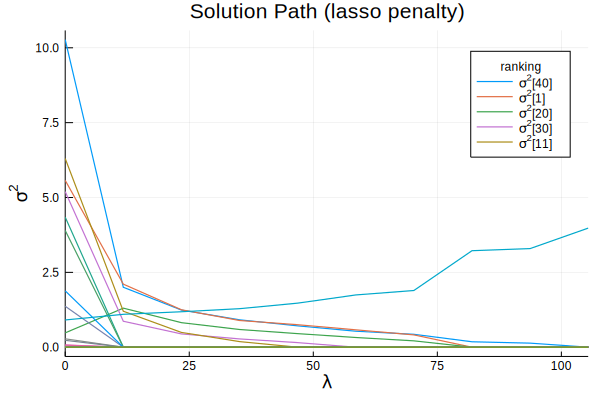

In [38]:
plotsolpath(σ̂2path_lasso, λpath_lasso; 
    title="Solution Path (lasso penalty)", xlab="\\lambda", ylab="\\sigma^2",
    linewidth=1.2)

Use `legend=false` if one does not wish to have legend. 

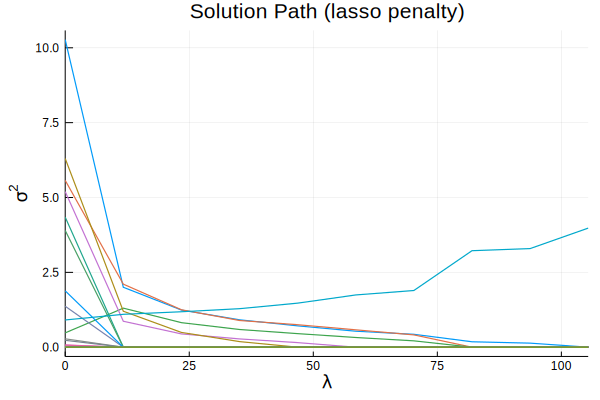

In [39]:
plotsolpath(σ̂2path_lasso, λpath_lasso; 
    title="Solution Path (lasso penalty)", xlab="\\lambda", ylab="\\sigma^2",
    linewidth=1.2, legend=false)

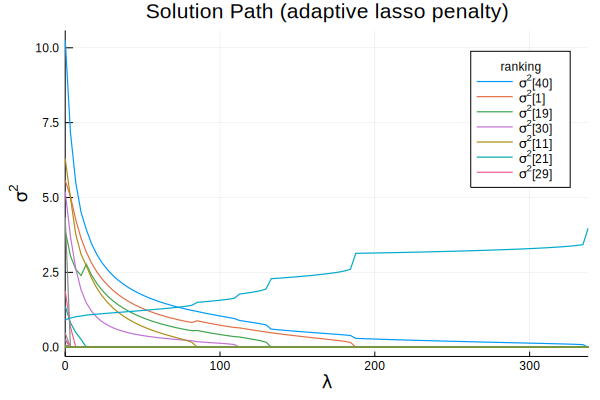

In [40]:
plotsolpath(σ̂2path_adlasso, λpath_adlasso; 
    title="Solution Path (adaptive lasso penalty)", 
    xlab="\\lambda", ylab="\\sigma^2", linewidth=1.2)

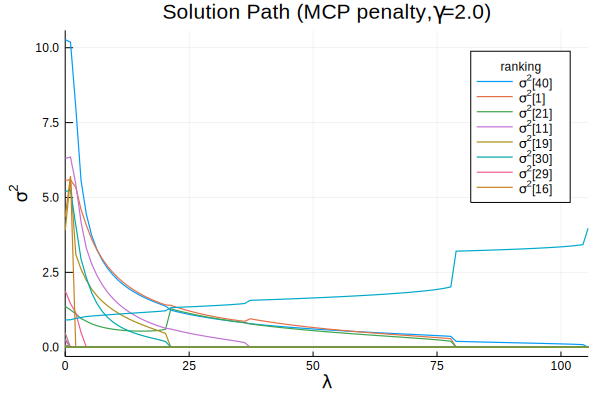

In [41]:
plotsolpath(σ̂2path_mcp2, λpath_mcp2; 
    title="Solution Path (MCP penalty, \\gamma=2.0)", 
    xlab="\\lambda", ylab="\\sigma^2", linewidth=1.2)

For MCP penalty, we used the default value `γ=2.0`. Instead, let's try `γ=2.69`, and plot the solution path. 

In [42]:
@time σ̂2path_mcp269, objpath_mcp269, λpath_mcp269 = 
        vcselectpath(y, X, V; penfun=MCPPenalty(2.69))

244.687613 seconds (287.97 k allocations: 53.294 GiB, 4.44% gc time)


([5.57283 5.41623 … 0.0 0.0; 1.01048e-85 0.0 … 0.0 0.0; … ; 10.272 10.2433 … 0.0863053 3.05648e-23; 0.910512 0.92094 … 3.42647 3.97836], [0.588849, 11.2832, 21.2767, 31.3225, 39.6927, 48.2533, 56.471, 64.3603, 71.9433, 79.2437  …  279.37, 279.8, 280.226, 280.65, 281.072, 281.493, 281.914, 282.341, 282.785, 274.78], 0.0:1.0652881627803605:105.46352811525568, [727, 278, 124, 424, 72, 61, 61, 62, 64, 68  …  54, 57, 62, 67, 74, 83, 96, 118, 166, 807])

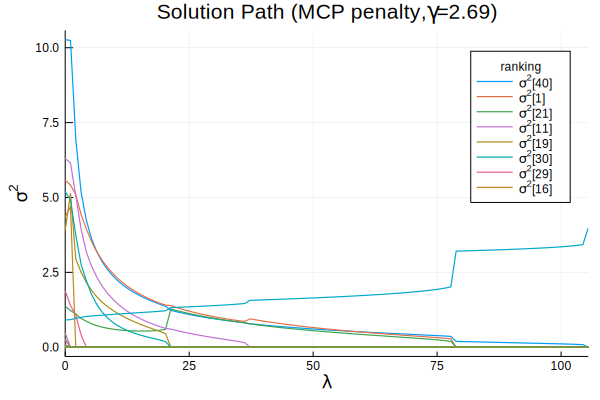

In [43]:
plotsolpath(σ̂2path_mcp269, λpath_mcp269; 
    title="Solution Path (MCP penalty, \\gamma=2.69)", 
    xlab="\\lambda", ylab="\\sigma^2", linewidth=1.2)